# Iris Dataset


This is an example of using skitlear to train a classifier and predict classes (classification) on the Iris dataset

https://en.wikipedia.org/wiki/Iris_flower_data_set

Following Chapter 3 of Python Machine Learning by Sebastian raschka


In [149]:
#import dataset from Skitlear

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn to "beautify" the charts
import seaborn as sns

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [8]:
#split training and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=0)

In [74]:
# Exploring iris dataset
#what type
type(iris)


sklearn.datasets.base.Bunch

Interesting type. More on the documentation

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html



In [75]:
# Let's print it

iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

It does look like a dictionary data structure

In [76]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Above we already loades the data the 2nd and 3rd index, which are the feature of the dataset to be explored in this tutorial and the target. Let's explore the target names, DESCR and feature names

In [81]:
# Target Names
iris['target_names']


array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

Looks like the targets are the flower species corresponding to the target int 0 to setosa, 1 to versicolor and 2 to virginica

In [82]:
# Target Names
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

There are 4 columns for features and we are analysing the petal lengh and width for this tutorial

In [111]:
# Let's create a pandas df shall we
import pandas as pd
df= pd.DataFrame(data=iris['data'],columns=iris['feature_names'])

In [85]:
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [113]:
# add last column as target
df['species']=pd.Series(iris.target)

In [114]:
# Check if all went well
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


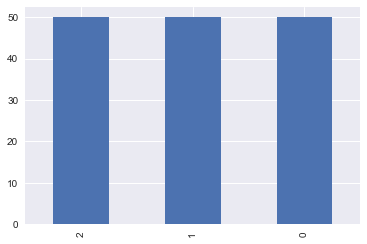

In [150]:
# plot the number of each target
df['species'].value_counts().plot.bar()

Same number of each species 50 each

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117c0d588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11865aa90>]], dtype=object)

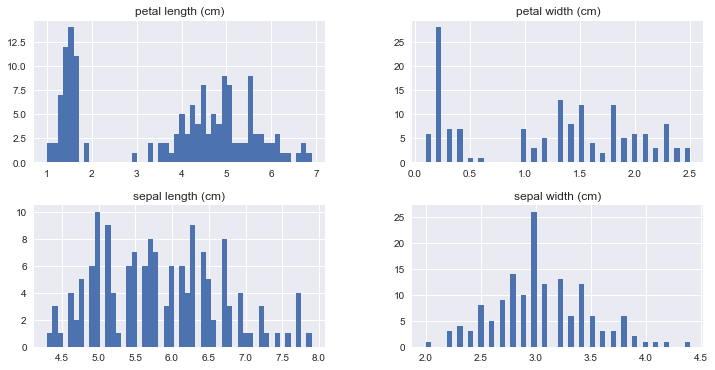

In [148]:

# explore disctibution of features
df.iloc[:,:4].hist(bins=50,figsize=(12,6))

Interesting that petal length and width distributions are not normally distributed. I wonder if that is due to belonging to a particular specie. To make it a bit clear lets break the dataset in 3 and then plot the histogram for each.

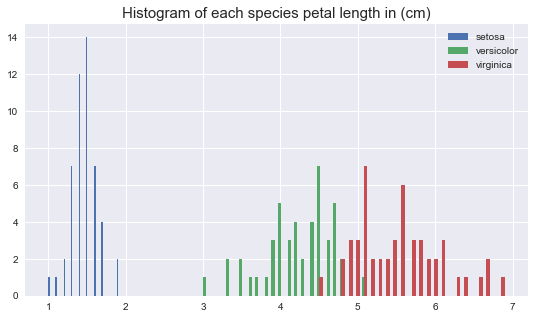

In [215]:
# create a plot to show each species petal length on shared x.y axis
plt.figure(figsize=(9,5))
for i,species in enumerate(iris['target_names']):
    plt.hist(df[df['species']==i].iloc[:,2],bins=50,label=species)

plt.legend(loc="upper right")
plt.title("Histogram of each species petal length in (cm)",fontsize=15)
plt.show()

In the histogram it clearly show that the petal length feature is a strong candidate for any machine learning as it can be a "water divider" for each species. In oder words based on the sample data we can pretty much say what species a Iris belongs to just by knowing its petal length in (cm)
Now let's plot the correlation matrix to analyse features and how they correlate to each other

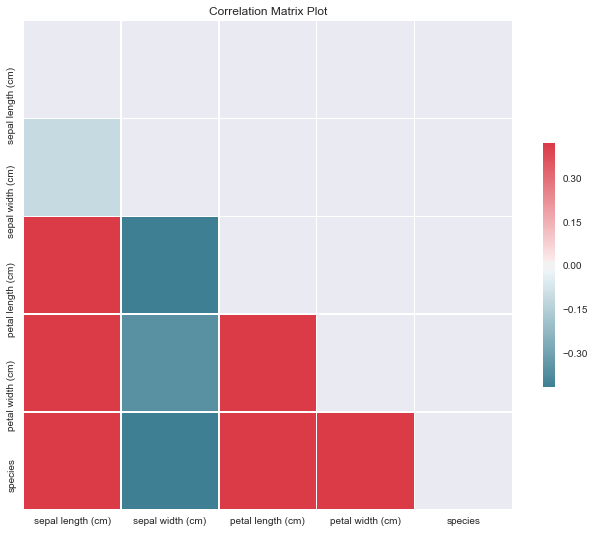

In [221]:
# import seaborne
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Plot')

In [235]:
# Display correlation matrix values
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [234]:
# display correlation matrix with species ordered by Descending
corr.iloc[:-1,-1].sort_values(ascending=False)

petal width (cm)     0.956464
petal length (cm)    0.949043
sepal length (cm)    0.782561
sepal width (cm)    -0.419446
Name: species, dtype: float64

The strongest correlations with species are 

<ul>Petal Length and Petal Width</ul>

However they are also strong correlated amongst them

So we would potentially drop one of them

Now back to the Machine Learning lets preprocess the data for training the model

In [13]:
#Data preporcessing (feature Scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [18]:
#Train (fit) model
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=.1,random_state=0)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [19]:
# predict results
y_pred = ppn.predict(X_test_std)

In [123]:
# amazing that the algo already dealt with multiclass built in OvA or One versus All which is a way to use multiple
# binary classifiers to tackle the problem then assign the classe the result that has the highest confidence
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0])

In [33]:
# check for number of wrong predictions
print('Misclassified Samples: ',  (y_test!=y_pred).sum())

Misclassified Samples:  4


In [41]:
# Can also use accuracy score from skitlearn
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f'  % accuracy_score(y_test,y_pred))

Accuracy: 0.91


In [55]:
#Defining function to ploting the results with decision region function
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]
            
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
    


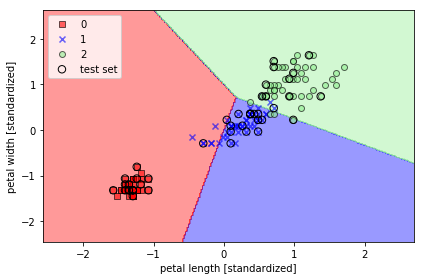

In [58]:
# Plotting results
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')


plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

In [237]:
# Getting the connfusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 2, 15,  1],
       [ 0,  1, 10]])

# logistic regression

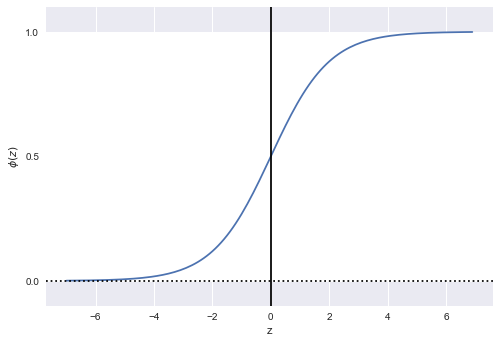

In [126]:
# plot sigmoid function from -7 to 7

def sigmoid(z):
    return 1/(1+np.exp(-z))
z=np.arange(-7,7,0.1)

phi_z=sigmoid(z)

plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.axhspan(0,1,facecolor='1.0',alpha=1,ls='dotted')
plt.axhline(0,ls='dotted',color='k')
plt.yticks([0,.5,1])
plt.ylim(-.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

In [131]:
# fit the data to logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_train_std,y_train)



LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

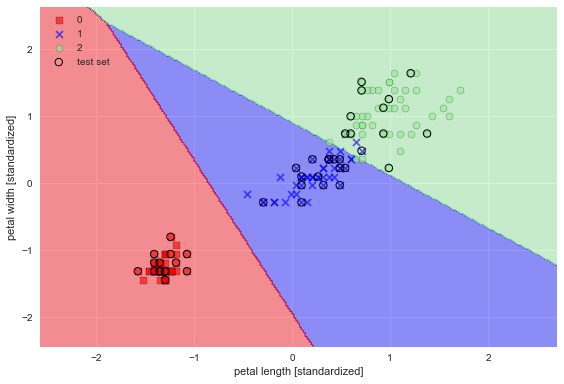

In [132]:
# plot

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()


In [135]:
#Logit predictions
logit_ypred = lr.predict(X_test_std)

In [137]:
#print accuracy
print('Accuracy: %.2f'  % accuracy_score(y_test,logit_ypred))

Accuracy: 0.98


In [143]:
#in logit regression we can also know the probability of predictions
#for example the fist row prediction probability for each label

lr.predict_proba(X_test_std[:1,:])

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

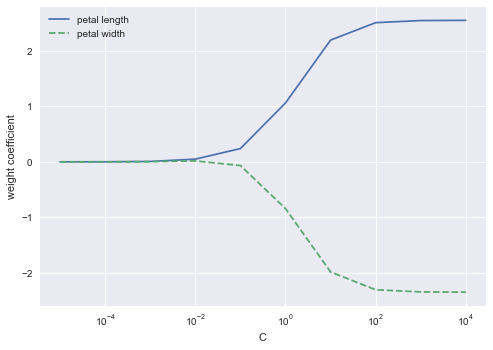

In [147]:
# plot to demonstrate how the tunning of the hyperparameter C of the LogisticRegression
# the lower the parameter the higher the regularization
# as the coeficient shrink as we reduce C
weights, params = [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('./figures/regression_path.png', dpi=300)
plt.show()